In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading  the Data

In [2]:
bike = pd.read_csv(r'C:\Users\91844\Desktop\My PGD DS\ML\day.csv')

# Data Understanding

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Preparation

### Checking for Null Values

In [8]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Duplicates check

In [9]:
bike_dup = bike

bike_dup.drop_duplicates(subset=None, inplace=True)

In [10]:
bike_dup.shape

(730, 16)

# Data Cleaning

In [11]:
# Now, let's create a copy of the dataset and check for the value_counts()

bike1 = bike.iloc[:,1:16]

for col in bike1:
    print(bike1[col].value_counts(), '\n')

12-09-2018    1
14-03-2018    1
03-08-2018    1
27-08-2018    1
11-02-2019    1
             ..
18-12-2018    1
04-10-2018    1
04-02-2018    1
06-08-2019    1
21-01-2018    1
Name: dteday, Length: 730, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

1    365
0    365
Name: yr, dtype: int64 

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64 

1    504
0    226
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           .

# Removing Unwanted columns

In [12]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
bike2 = bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [14]:
bike2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [15]:
bike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting the values in columns

In [16]:
# We can see season, yr, mnth, holiday, weekday, workingday, weathersit are all categorical variables.

# Let's replace season, weekday and weathersit with appropriate values.

In [17]:
bike2.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
def ass_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
bike2.season = bike2.season.apply(ass_season)

In [19]:
bike2.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [20]:
bike2.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
def ass_weathersit(x):
    if x==1:
        return 'Clear_Few Clouds'
    elif x==2:
        return 'Mist_cloudy'
    elif x==3:
        return 'Light rain_Light snow_Thunderstorm'
    else:
        return 'Heavy Rain_Ice Pallets_Thunderstorm_Mist'
    
bike2.weathersit = bike2.weathersit.apply(ass_weathersit)

In [22]:
bike2.weathersit.value_counts()

Clear_Few Clouds                      463
Mist_cloudy                           246
Light rain_Light snow_Thunderstorm     21
Name: weathersit, dtype: int64

In [23]:
bike2.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [24]:
def ass_weekday(x):
    if x==0:
        return 'Sunday'
    elif x==1:
        return 'Monday'
    elif x==2:
        return 'Tuesday'
    elif x==3:
        return 'Wednesday'
    elif x==4:
        return 'Thursday'
    elif x==5:
        return 'Friday'
    else:
        return 'Saturday'
    
bike2.weekday = bike2.weekday.apply(ass_weekday)

In [25]:
bike2.weekday.value_counts()

Monday       105
Tuesday      105
Thursday     104
Saturday     104
Wednesday    104
Sunday       104
Friday       104
Name: weekday, dtype: int64

In [26]:
bike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
bike2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 74.1+ KB


# Exploratory Data Analysis

# Data Visualisation

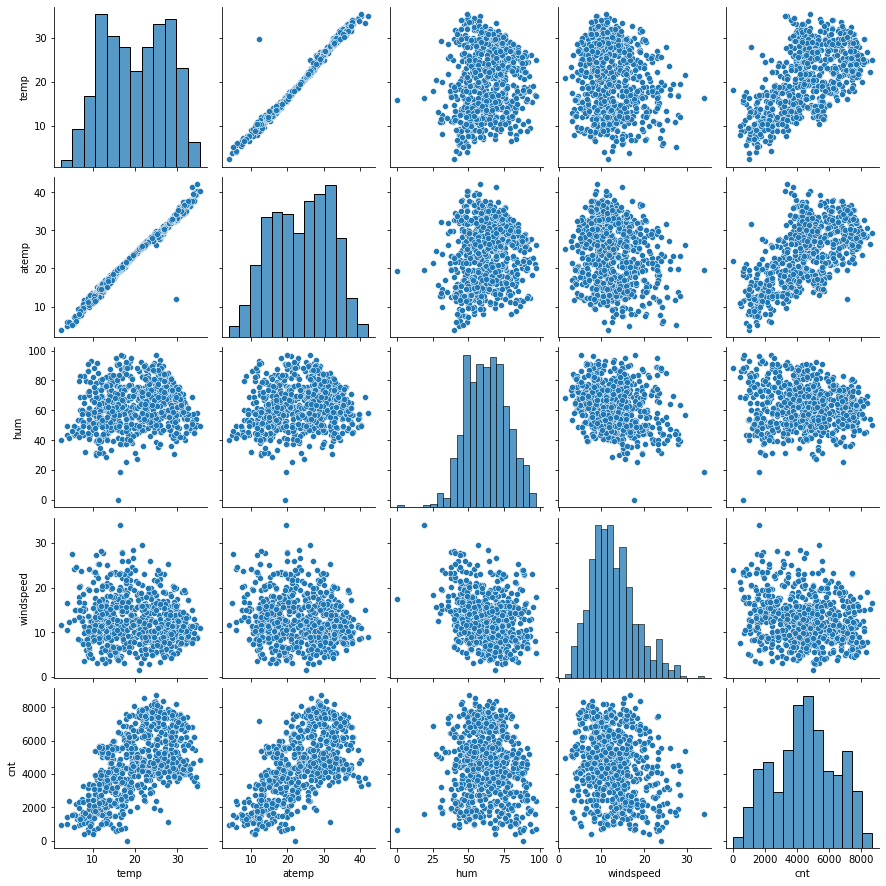

In [28]:
sns.pairplot(bike2, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [29]:
# A linear relation can be clearly seen between temp and atemp.
# Let's see the correlation between them.

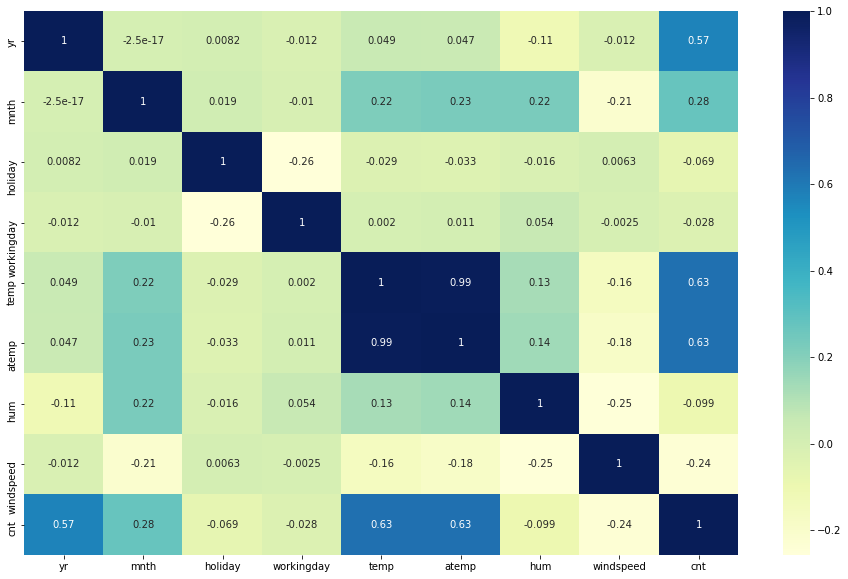

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(bike2.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [31]:
# The correlation between temp and atemp is 0.99 which is very high so we can just drop column temp.

In [32]:
bike2.drop(['temp'], axis=1, inplace=True)
bike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


### Visualising Categorical Variables

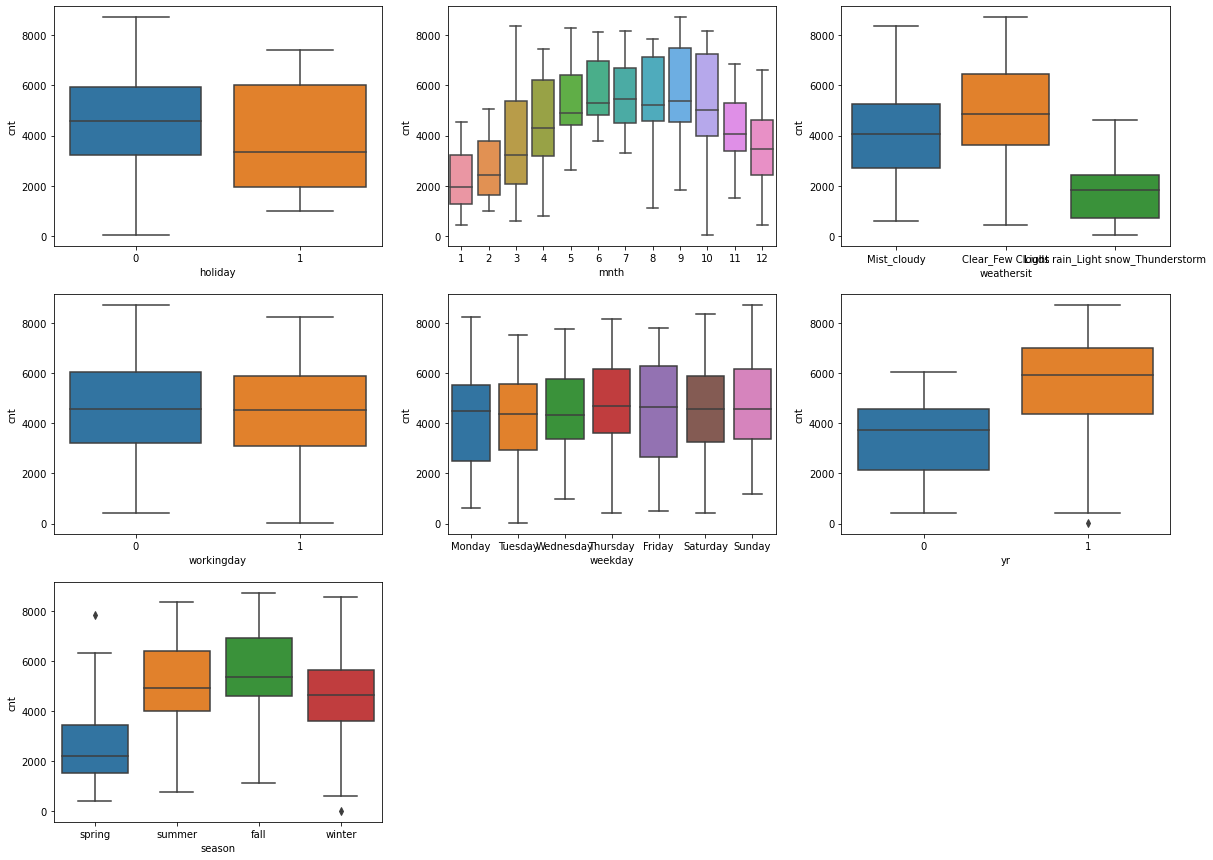

In [33]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike2)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike2)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike2)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike2)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike2)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike2)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = bike2)
plt.show()

# Creating Dummy Variables

In [34]:
bike2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 88.4+ KB


In [35]:
# Converting to 'category' dtype

bike2['weekday'] = bike2['weekday'].astype('category')
bike2['weathersit'] = bike2['weathersit'].astype('category')
bike2['season'] = bike2['season'].astype('category')
bike2['mnth'] = bike2['mnth'].astype('category')
bike2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   atemp       730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 69.5 KB


#### Now, let's create dummy variables for categorical columns.

In [36]:
Day = pd.get_dummies(bike2['weekday'], drop_first=True)
Weather_conditions = pd.get_dummies(bike2['weathersit'], drop_first=True)
Season_conditions = pd.get_dummies(bike2['season'], drop_first=True)
Month = pd.get_dummies(bike2['mnth'], drop_first=True)

In [37]:
bike2 = pd.concat([bike2, Day], axis=1)
bike2 = pd.concat([bike2, Weather_conditions], axis=1)
bike2 = pd.concat([bike2, Season_conditions], axis=1)
bike2 = pd.concat([bike2, Month], axis=1)

In [38]:
bike2.info

<bound method DataFrame.info of      season  yr mnth  holiday    weekday  workingday        weathersit  \
0    spring   0    1        0     Monday           1       Mist_cloudy   
1    spring   0    1        0    Tuesday           1       Mist_cloudy   
2    spring   0    1        0  Wednesday           1  Clear_Few Clouds   
3    spring   0    1        0   Thursday           1  Clear_Few Clouds   
4    spring   0    1        0     Friday           1  Clear_Few Clouds   
..      ...  ..  ...      ...        ...         ...               ...   
725  spring   1   12        0     Friday           1       Mist_cloudy   
726  spring   1   12        0   Saturday           0       Mist_cloudy   
727  spring   1   12        0     Sunday           0       Mist_cloudy   
728  spring   1   12        0     Monday           1  Clear_Few Clouds   
729  spring   1   12        0    Tuesday           1       Mist_cloudy   

        atemp      hum  windspeed  ...  3  4  5  6  7  8  9  10  11  12  
0    

In [39]:
bike2.columns

Index([                            'season',
                                       'yr',
                                     'mnth',
                                  'holiday',
                                  'weekday',
                               'workingday',
                               'weathersit',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'spring',
                                   'summer',
                                   'winter',
          

In [40]:
bike2.shape

(730, 33)

In [41]:
# Now, let's delete the original columns : weekday, weathersit, season and mnth.

In [42]:
bike2.drop(['weekday'], axis=1, inplace = True)
bike2.drop(['weathersit'], axis=1, inplace = True)
bike2.drop(['season'], axis=1, inplace = True)
bike2.drop(['mnth'], axis=1, inplace = True)

In [43]:
bike2.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the data

In [44]:
# Now our data is ready to split

In [45]:
np.random.seed(0)
bike2_train, bike2_test = train_test_split(bike2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
bike2_train.info

<bound method DataFrame.info of      yr  holiday  workingday     atemp      hum  windspeed   cnt  Monday  \
653   1        0           1  23.04230  55.8333  12.208807  7534       0   
576   1        0           1  33.14480  70.4167  11.083475  7216       0   
426   1        0           0  20.67460  62.1250  10.792293  4066       0   
728   1        0           1  11.58500  48.3333  23.500518  1796       1   
482   1        0           0  18.87520  48.9583   8.708325  4220       0   
..   ..      ...         ...       ...      ...        ...   ...     ...   
526   1        0           1  32.98605  58.7917  13.916771  6664       0   
578   1        0           1  35.35440  65.9583   8.666718  7261       0   
53    0        0           1  12.28585  42.3043   6.305571  1917       0   
350   0        0           1  12.46855  56.0833  16.292189  2739       1   
79    0        0           1  20.48675  73.7391  19.348461  2077       0   

     Saturday  Sunday  ...  3  4  5  6  7  8  9  10  11

In [47]:
bike2_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,0,0,1,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [48]:
bike2_train.shape

(510, 29)

In [49]:
bike2_test.info

<bound method DataFrame.info of      yr  holiday  workingday     atemp      hum  windspeed   cnt  Monday  \
184   0        1           0  33.27085  63.7917   5.459106  6043       0   
535   1        0           1  36.04875  59.2083   7.625404  6211       0   
299   0        0           0  22.85230  81.2917  13.250121  2659       0   
221   0        0           1  34.24915  42.4167  13.417286  4780       0   
152   0        0           0  32.19710  30.5000  19.583229  4968       0   
..   ..      ...         ...       ...      ...        ...   ...     ...   
400   1        0           1  13.22605  68.7917  11.791732  2947       0   
702   1        0           1  23.45270  73.3750  11.666643  6606       0   
127   0        0           1  25.94665  63.1667   5.000712  4333       0   
640   1        0           1  29.95665  79.3750   4.458569  7572       0   
72    0        0           1  16.60000  49.6957   9.174042  2046       0   

     Saturday  Sunday  ...  3  4  5  6  7  8  9  10  11

In [50]:
bike2_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,1,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
bike2_test.shape

(219, 29)

# Rescaling the features

In [52]:
# Applying scaler() to all the Numerical data

scaler = MinMaxScaler()

In [53]:
num_vars = ['atemp', 'hum', 'windspeed','cnt']

bike2_train[num_vars] = scaler.fit_transform(bike2_train[num_vars])

In [54]:
bike2_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.154902,0.129412,0.137255,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.362166,0.335985,0.344454,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
bike2_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,1,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# Building the linear regression model

### Creating X and y for model building

In [56]:
y_train = bike2_train.pop('cnt')
X_train = bike2_train

# RFE

In [57]:
# Here, we will use RFE i.e Recursive feature elimination, approach with LinearRegression function from SciKit Learn
# Let's start with 15 vars first.

In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [59]:
list (zip (X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 12)]

In [60]:
col = X_train.columns[rfe.support_]

In [61]:
X_train.columns[~rfe.support_]

Index(['workingday',     'Monday',   'Saturday',     'Sunday',   'Thursday',
          'Tuesday',  'Wednesday',     'summer',            2,            7,
                 10,           11,           12],
      dtype='object')

In [62]:
# Creating X_test dataframe with variables that RFE selected.
X_train_rfe = X_train[col]

# Building Linear Regression model using 'STATS MODEL'

## Model number 1

In [63]:
# First, let's check for the VIF values.

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
7,spring,3.52
8,winter,3.21
6,Mist_cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [64]:
# Adding a constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

# Creating our first fitted model
lr1 = sm.OLS(y_train,X_train_rfe1).fit()

In [65]:
lr1.params

const                                 0.299460
yr                                    0.232043
holiday                              -0.084487
atemp                                 0.459669
hum                                  -0.159931
windspeed                            -0.161350
Light rain_Light snow_Thunderstorm   -0.235928
Mist_cloudy                          -0.056783
spring                               -0.075745
winter                                0.102381
3                                     0.058486
4                                     0.059104
5                                     0.092243
6                                     0.058334
8                                     0.060794
9                                     0.117512
dtype: float64

In [66]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          8.06e-186
Time:                        21:51:21   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [67]:
# The column 'hum' has a very high VIF so we will drop it.
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

## Model number 2

In [68]:
# Adding a constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr2 = sm.OLS(y_train,X_train_rfe1).fit()

In [69]:
lr2.params

const                                 0.215112
yr                                    0.235512
holiday                              -0.085381
atemp                                 0.429806
windspeed                            -0.133203
Light rain_Light snow_Thunderstorm   -0.279946
Mist_cloudy                          -0.081982
spring                               -0.081480
winter                                0.091134
3                                     0.059717
4                                     0.059700
5                                     0.081709
6                                     0.062762
8                                     0.059446
9                                     0.111819
dtype: float64

In [70]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.75e-183
Time:                        21:51:21   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [71]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
6,spring,2.10
0,yr,2.08
7,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
5,Mist_cloudy,1.55
9,4,1.54


In [72]:
# It can be seeen that a few variables still have a high VIF, let's drop 'atemp'

In [73]:
X_train_rfe = X_train_rfe.drop(['atemp'], axis=1)

## Model number 3

In [74]:
# Adding a constant
X_train_rfe2 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr3 = sm.OLS(y_train, X_train_rfe2).fit()

In [75]:
lr3.params

const                                 0.508219
yr                                    0.247924
holiday                              -0.088614
windspeed                            -0.164451
Light rain_Light snow_Thunderstorm   -0.289592
Mist_cloudy                          -0.094284
spring                               -0.239239
winter                               -0.008014
3                                     0.049371
4                                    -0.015268
5                                     0.067127
6                                     0.090114
8                                     0.092919
9                                     0.131762
dtype: float64

In [76]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.90e-153
Time:                        21:51:21   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [77]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
5,spring,2.10
0,yr,1.90
6,winter,1.80
4,Mist_cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [78]:
# Looking at the VIF table, we will drop windspeed since it's VIF > 2
X_train_rfe = X_train_rfe.drop(['windspeed'], axis=1)

In [79]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'spring',
                                   'winter',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

## Model number 4

In [80]:
# Adding a constant
X_train_rfe3 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr4 = sm.OLS(y_train, X_train_rfe3).fit()

In [81]:
lr4.params

const                                 0.461576
yr                                    0.247755
holiday                              -0.091818
Light rain_Light snow_Thunderstorm   -0.305210
Mist_cloudy                          -0.093406
spring                               -0.251551
winter                               -0.009302
3                                     0.039525
4                                    -0.038639
5                                     0.063829
6                                     0.087376
8                                     0.096108
9                                     0.138063
dtype: float64

In [82]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          9.96e-148
Time:                        21:51:21   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [83]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
3,Mist_cloudy,1.53
4,spring,1.48
5,winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.08


In [84]:
# Clearly, winter has a very high p value, it needs to be dropped.
X_train_rfe = X_train_rfe.drop(['winter'], axis=1)

In [85]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'spring',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

## Model number 5

In [86]:
# Adding a constant
X_train_rfe4 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr5 = sm.OLS(y_train, X_train_rfe4).fit()

In [87]:
lr5.params

const                                 0.455207
yr                                    0.247756
holiday                              -0.092376
Light rain_Light snow_Thunderstorm   -0.305997
Mist_cloudy                          -0.093817
spring                               -0.245727
3                                     0.042337
4                                    -0.032102
5                                     0.070389
6                                     0.093820
8                                     0.102628
9                                     0.142626
dtype: float64

In [88]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          9.28e-149
Time:                        21:51:21   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [89]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
4,spring,1.41
3,Mist_cloudy,1.39
5,3,1.23
9,8,1.13
6,4,1.11
7,5,1.11
10,9,1.11
8,6,1.07
1,holiday,1.03


In [90]:
# Based on the p values in the summary, we will drop column 4 as it has a very high p val
X_train_rfe = X_train_rfe.drop([4], axis=1)

In [91]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'spring',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

## Model number 6

In [92]:
# Adding a constant
X_train_rfe5 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr6 = sm.OLS(y_train, X_train_rfe5).fit()

In [93]:
lr6.params

const                                 0.449303
yr                                    0.246896
holiday                              -0.091638
Light rain_Light snow_Thunderstorm   -0.303868
Mist_cloudy                          -0.093767
spring                               -0.240190
3                                     0.045025
5                                     0.076669
6                                     0.100167
8                                     0.109021
9                                     0.148809
dtype: float64

In [94]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.76e-149
Time:                        21:51:21   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [95]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
4,spring,1.39
3,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
2,Light rain_Light snow_Thunderstorm,1.02


### Now, let's start adding more variables and see if the model imporves.
### Adding Sunday

In [96]:
X_train_rfe['Sunday'] = X_train['Sunday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Sunday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,1,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,0
482,1,0,0,1,0,0,0,0,0,0,1


## Model number 7

In [97]:
# Adding a constant
X_train_rfe6 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr7 = sm.OLS(y_train, X_train_rfe6).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.28e-148
Time:                        21:51:21   Log-Likelihood:                 407.44
No. Observations:                 510   AIC:                            -790.9
Df Residuals:                     498   BIC:                            -740.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [98]:
# Sunday has high p-value so we drop it
X_train_rfe = X_train_rfe.drop(['Sunday'], axis=1)

## Model number 8

In [99]:
# Adding a constant
X_train_rfe7 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr8 = sm.OLS(y_train, X_train_rfe7).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.76e-149
Time:                        21:51:21   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [100]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
4,spring,1.39
3,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
2,Light rain_Light snow_Thunderstorm,1.02


## Adding Saturday

In [101]:
X_train_rfe['Saturday'] = X_train['Saturday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Saturday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,1,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0


## Model number 9

In [102]:
# Adding a constant
X_train_rfe8 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr9 = sm.OLS(y_train, X_train_rfe8).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.58e-148
Time:                        21:51:22   Log-Likelihood:                 407.23
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     498   BIC:                            -739.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [103]:
# Saturday has high p-value so we drop it
X_train_rfe = X_train_rfe.drop(['Saturday'], axis=1)

## Model number 10

In [104]:
# Adding a constant
X_train_rfe9 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr10 = sm.OLS(y_train, X_train_rfe9).fit()
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.76e-149
Time:                        21:51:22   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Adding Monday

In [105]:
X_train_rfe['Monday'] = X_train['Monday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Monday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,1,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,1
482,1,0,0,1,0,0,0,0,0,0,0


## Model number 11

In [106]:
# Adding a constant
X_train_rfe10 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr11 = sm.OLS(y_train, X_train_rfe10).fit()
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.54e-149
Time:                        21:51:22   Log-Likelihood:                 408.77
No. Observations:                 510   AIC:                            -793.5
Df Residuals:                     498   BIC:                            -742.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [107]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.53
4,spring,1.41
3,Mist_cloudy,1.37
5,3,1.22
8,8,1.13
10,Monday,1.12
9,9,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


## Adding Tuesday

In [108]:
X_train_rfe['Tuesday'] = X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Monday,Tuesday
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,1,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0


## Model number 12

In [109]:
# Adding a constant
X_train_rfe11 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr12 = sm.OLS(y_train, X_train_rfe11).fit()
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.78e-149
Time:                        21:51:22   Log-Likelihood:                 411.06
No. Observations:                 510   AIC:                            -796.1
Df Residuals:                     497   BIC:                            -741.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [110]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.57
4,spring,1.42
3,Mist_cloudy,1.38
5,3,1.23
10,Monday,1.14
11,Tuesday,1.14
8,8,1.13
9,9,1.11
6,5,1.10
7,6,1.08


## Adding Wednesday

In [111]:
X_train_rfe['Wednesday'] = X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Monday,Tuesday,Wednesday
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,1,1,1,0,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


## Model number 13

In [112]:
# Adding a constant
X_train_rfe12 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr13 = sm.OLS(y_train, X_train_rfe12).fit()
print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     126.7
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.22e-148
Time:                        21:51:22   Log-Likelihood:                 411.66
No. Observations:                 510   AIC:                            -795.3
Df Residuals:                     496   BIC:                            -736.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [113]:
# Wednesday has high p-value so we drop it
X_train_rfe = X_train_rfe.drop(['Wednesday'], axis=1)

## Model number 14

In [114]:
# Adding a constant
X_train_rfe13 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr14 = sm.OLS(y_train, X_train_rfe13).fit()
print(lr14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.78e-149
Time:                        21:51:22   Log-Likelihood:                 411.06
No. Observations:                 510   AIC:                            -796.1
Df Residuals:                     497   BIC:                            -741.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Adding Thursday

In [115]:
X_train_rfe['Thursday'] = X_train['Thursday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Monday,Tuesday,Thursday
653,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,1,0,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


## Model number 15

In [116]:
# Adding a constant
X_train_rfe14 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr15 = sm.OLS(y_train, X_train_rfe14).fit()
print(lr15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     126.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.94e-148
Time:                        21:51:22   Log-Likelihood:                 411.22
No. Observations:                 510   AIC:                            -794.4
Df Residuals:                     496   BIC:                            -735.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [117]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.64
4,spring,1.43
3,Mist_cloudy,1.38
5,3,1.23
11,Tuesday,1.17
12,Thursday,1.17
10,Monday,1.16
8,8,1.14
6,5,1.12
9,9,1.12


In [118]:
# Thursday has high p-value so we drop it
X_train_rfe = X_train_rfe.drop(['Thursday'], axis=1)

## Model number 16

In [119]:
# Adding a constant
X_train_rfe15 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr16 = sm.OLS(y_train, X_train_rfe15).fit()
print(lr16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.78e-149
Time:                        21:51:22   Log-Likelihood:                 411.06
No. Observations:                 510   AIC:                            -796.1
Df Residuals:                     497   BIC:                            -741.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

# Adding workingday

In [120]:
X_train_rfe['workingday'] = X_train['workingday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Monday,Tuesday,workingday
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,1,1,1,0,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,1,0,1
482,1,0,0,1,0,0,0,0,0,0,0,0,0


## Model number 17

In [121]:
# Adding a constant
X_train_rfe16 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr17 = sm.OLS(y_train, X_train_rfe16).fit()
print(lr17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     126.8
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.89e-148
Time:                        21:51:22   Log-Likelihood:                 411.77
No. Observations:                 510   AIC:                            -795.5
Df Residuals:                     496   BIC:                            -736.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [122]:
# workingday has high p-value so we drop it
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

## Model number 18

In [123]:
# Adding a constant
X_train_rfe17 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr18 = sm.OLS(y_train, X_train_rfe17).fit()
print(lr18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.78e-149
Time:                        21:51:23   Log-Likelihood:                 411.06
No. Observations:                 510   AIC:                            -796.1
Df Residuals:                     497   BIC:                            -741.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

# Adding month 2

In [124]:
X_train_rfe[2] = X_train[2]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Monday,Tuesday,2
653,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,1,0,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


## Model number 19

In [125]:
# Adding a constant
X_train_rfe18 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr19 = sm.OLS(y_train, X_train_rfe18).fit()
print(lr19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          5.44e-148
Time:                        21:51:23   Log-Likelihood:                 411.12
No. Observations:                 510   AIC:                            -794.2
Df Residuals:                     496   BIC:                            -735.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [126]:
# month 2 has high p-value so we drop it
X_train_rfe = X_train_rfe.drop([2], axis=1)

## Model number 20

In [127]:
# Adding a constant
X_train_rfe19 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr20 = sm.OLS(y_train, X_train_rfe19).fit()
print(lr20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.78e-149
Time:                        21:51:23   Log-Likelihood:                 411.06
No. Observations:                 510   AIC:                            -796.1
Df Residuals:                     497   BIC:                            -741.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [128]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.57
4,spring,1.42
3,Mist_cloudy,1.38
5,3,1.23
10,Monday,1.14
11,Tuesday,1.14
8,8,1.13
9,9,1.11
6,5,1.10
7,6,1.08


In [129]:
# Adding month 12

In [130]:
X_train_rfe[12] = X_train[12]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Monday,Tuesday,12
653,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,1,0,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,1,0,1
482,1,0,0,1,0,0,0,0,0,0,0,0,0


## Model number 21

In [131]:
# Adding a constant
X_train_rfe20 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr21 = sm.OLS(y_train, X_train_rfe20).fit()
print(lr21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     128.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.55e-149
Time:                        21:51:23   Log-Likelihood:                 413.68
No. Observations:                 510   AIC:                            -799.4
Df Residuals:                     496   BIC:                            -740.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [132]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.59
4,spring,1.44
3,Mist_cloudy,1.40
5,3,1.24
10,Monday,1.15
11,Tuesday,1.15
8,8,1.13
6,5,1.11
9,9,1.11
12,12,1.10


# Adding month 11

In [133]:
X_train_rfe[11] = X_train[11]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,3,5,6,8,9,Monday,Tuesday,12,11
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,1,0,0,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,1,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0


## Model number 22

In [134]:
# Adding a constant
X_train_rfe21 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr22 = sm.OLS(y_train, X_train_rfe21).fit()
print(lr22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     121.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          5.68e-150
Time:                        21:51:23   Log-Likelihood:                 418.38
No. Observations:                 510   AIC:                            -806.8
Df Residuals:                     495   BIC:                            -743.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [135]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.64
4,spring,1.46
3,Mist_cloudy,1.43
5,3,1.24
10,Monday,1.16
11,Tuesday,1.16
8,8,1.15
13,11,1.14
9,9,1.13
6,5,1.12


In [136]:
# month 3 has high p-value so we drop it
X_train_rfe = X_train_rfe.drop([3], axis=1)

## Model number 23

In [137]:
# Adding a constant
X_train_rfe22 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr23 = sm.OLS(y_train, X_train_rfe22).fit()
print(lr23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     130.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.16e-150
Time:                        21:51:23   Log-Likelihood:                 416.84
No. Observations:                 510   AIC:                            -805.7
Df Residuals:                     496   BIC:                            -746.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [138]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.62
3,Mist_cloudy,1.42
4,spring,1.30
9,Monday,1.16
10,Tuesday,1.16
7,8,1.14
12,11,1.14
8,9,1.13
5,5,1.12
6,6,1.09


# Adding month 10

In [139]:
X_train_rfe[10] = X_train[10]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,5,6,8,9,Monday,Tuesday,12,11,10
653,1,0,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,1,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0


## Model number 24

In [140]:
# Adding a constant
X_train_rfe23 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr24 = sm.OLS(y_train, X_train_rfe23).fit()
print(lr24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     123.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.08e-151
Time:                        21:51:23   Log-Likelihood:                 421.81
No. Observations:                 510   AIC:                            -813.6
Df Residuals:                     495   BIC:                            -750.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [141]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
3,Mist_cloudy,1.48
4,spring,1.34
13,10,1.19
9,Monday,1.18
10,Tuesday,1.17
7,8,1.16
12,11,1.16
8,9,1.15
5,5,1.13


# Adding month 7

In [142]:
X_train_rfe[7] = X_train[7]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,5,6,8,9,Monday,Tuesday,12,11,10,7
653,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Model number 25

In [143]:
# Adding a constant
X_train_rfe24 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr25 = sm.OLS(y_train, X_train_rfe24).fit()
print(lr25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     123.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.88e-156
Time:                        21:51:24   Log-Likelihood:                 436.41
No. Observations:                 510   AIC:                            -840.8
Df Residuals:                     494   BIC:                            -773.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [144]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.78
3,Mist_cloudy,1.48
4,spring,1.38
9,Monday,1.21
10,Tuesday,1.20
13,10,1.20
7,8,1.18
12,11,1.18
8,9,1.16
5,5,1.14


In [145]:
# month 7 has high p-value so we drop it
X_train_rfe = X_train_rfe.drop([7], axis=1)

## Model number 26

In [146]:
# Adding a constant
X_train_rfe25 = sm.add_constant(X_train_rfe)

# Creating the fitted model
lr26 = sm.OLS(y_train, X_train_rfe25).fit()
print(lr26.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     123.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.08e-151
Time:                        21:51:24   Log-Likelihood:                 421.81
No. Observations:                 510   AIC:                            -813.6
Df Residuals:                     495   BIC:                            -750.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [147]:
# VIF Check
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
3,Mist_cloudy,1.48
4,spring,1.34
13,10,1.19
9,Monday,1.18
10,Tuesday,1.17
7,8,1.16
12,11,1.16
8,9,1.15
5,5,1.13


# We have checked all the models so now we can select the best one to go ahead and predict the values.

## Model lr26 seems to give good results so we will now move forward.

## VALIDATE ASSUMPTIONS
### Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

# Predicting values

In [148]:
y_train_cnt = lr26.predict(X_train_rfe25)

Text(0.5, 0, 'Errors')

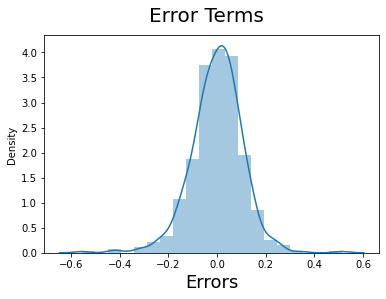

In [149]:
res = y_train - y_train_cnt

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### We can see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [150]:
print(X_train_rfe25.shape)
print(res.shape)

(510, 15)
(510,)


In [151]:
X_train_rfe25.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'spring',
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Monday',
                                  'Tuesday',
                                         12,
                                         11,
                                         10],
      dtype='object')

### Now that we have fitted the model and checked the assumptions, it's time to go ahead.

In [152]:
num_vars = ['atemp', 'hum', 'windspeed','cnt']
bike2_test[num_vars] = scaler.fit_transform(bike2_test[num_vars])

In [153]:
y_test = bike2_test.pop('cnt')
X_test = bike2_test

In [154]:
X_train_new = X_train_rfe25.drop(['const'], axis=1)

In [155]:
# Now, let's make predicaitons by using the model
# X_test_new dataframe is created by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant
X_test_new = sm.add_constant(X_test_new)

In [156]:
X_train_rfe25.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'spring',
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Monday',
                                  'Tuesday',
                                         12,
                                         11,
                                         10],
      dtype='object')

In [157]:
# Making predictions using the final model (lr26)

y_pred = lr26.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

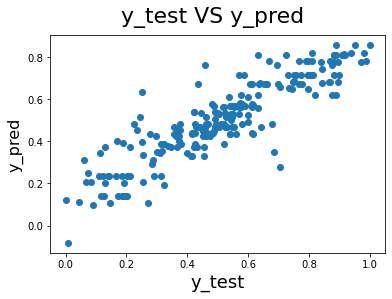

In [158]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()

plt.scatter(y_test, y_pred)
fig.suptitle('y_test VS y_pred', fontsize = 22) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

## Clearly, the actual and predicted cnt values i.e demand of bikes are overlapping indicating the model is good enough and is able to explain the change in demand.

In [159]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7830959543929239

In [160]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.1109163572809531

In [161]:
# We already have the value of R^2 (calculated in above step)

r2 = 0.7830959543929239

In [162]:
X_test.shape

(219, 28)

In [163]:
X_train_new.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,spring,5,6,8,9,Monday,Tuesday,12,11,10
653,1,0,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,1,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [164]:
print(X_train_rfe25.columns)
print(lr26.summary())

Index([                             'const',
                                       'yr',
                                  'holiday',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'spring',
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Monday',
                                  'Tuesday',
                                         12,
                                         11,
                                         10],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:             

## Demand for bikes depends mainly on the below variables:

### yr, holiday, Light rain_Light snow_Thunderstorm, Mist_cloudy, spring, 5, 6, 8, 9, Monday, Tuesday, 12, 11, 10.

### Demand increases in yr, 5, 6, 8, 9 and 10.

### Demand decreases in holiday, Light rain_Light snow_Thunderstorm, Mist_cloudy, spring, Monday, Tuesday, 12, 11.

# Final recommendatons: 5, 6, 8, 9 and 10.